### Simple Linear Regression

In [23]:
#Import the needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [24]:
#Download the data as csv file
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-12-09 12:49:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  192K 0s
    50K .......... ..........                                 100% 16.7M=0.3s

2021-12-09 12:49:11 (271 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [25]:
#Creating a data frame object for the data set
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
#Explore the data 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [27]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


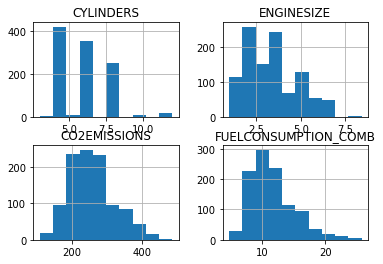

In [28]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

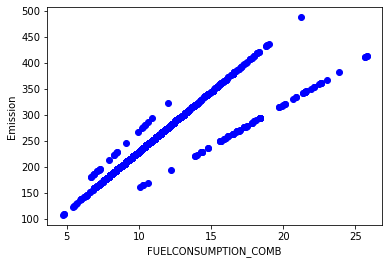

In [29]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

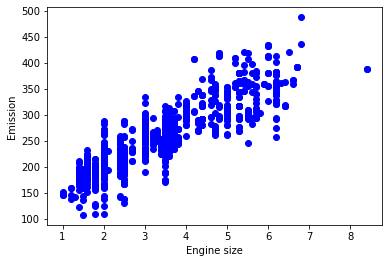

In [30]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

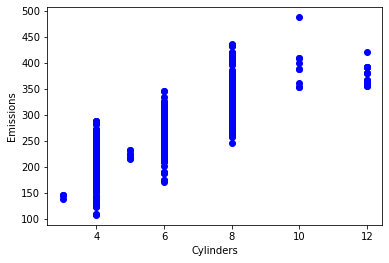

In [31]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

In [32]:
#Creating training and test data sets
#Here we test the out-of-sample accuracy
msk = np.random.rand(len(df)) < 0.8 #80% will be used for training
train = cdf[msk] #include the chosen rows 
test = cdf[~msk] #Dont include the chosen rows

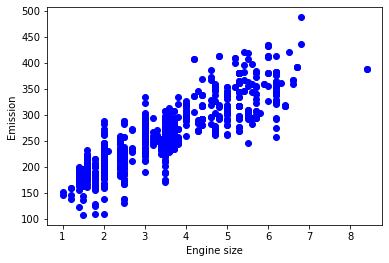

In [33]:
#The training set distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [34]:
#Now we model

#Import library
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.404279]]
Intercept:  [127.78918313]


Text(0, 0.5, 'Emission')

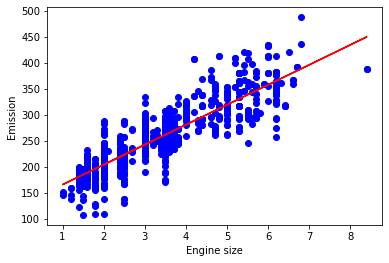

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [36]:
#Exaluating the model

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.48
Residual sum of squares (MSE): 772.61
R2-score: 0.80


### Multiple Linear regression 

In [37]:
#Import library 
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.23782     7.52336839  9.75006957]]


#### Ordinary Least Squares (OLS)

    Solving the model parameters analytically using closed-form equations
    Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


In [38]:
#Prediction

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 485.65
Variance score: 0.88


C:\Users\moham\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
#FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

KeyError: "['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'] not in index"